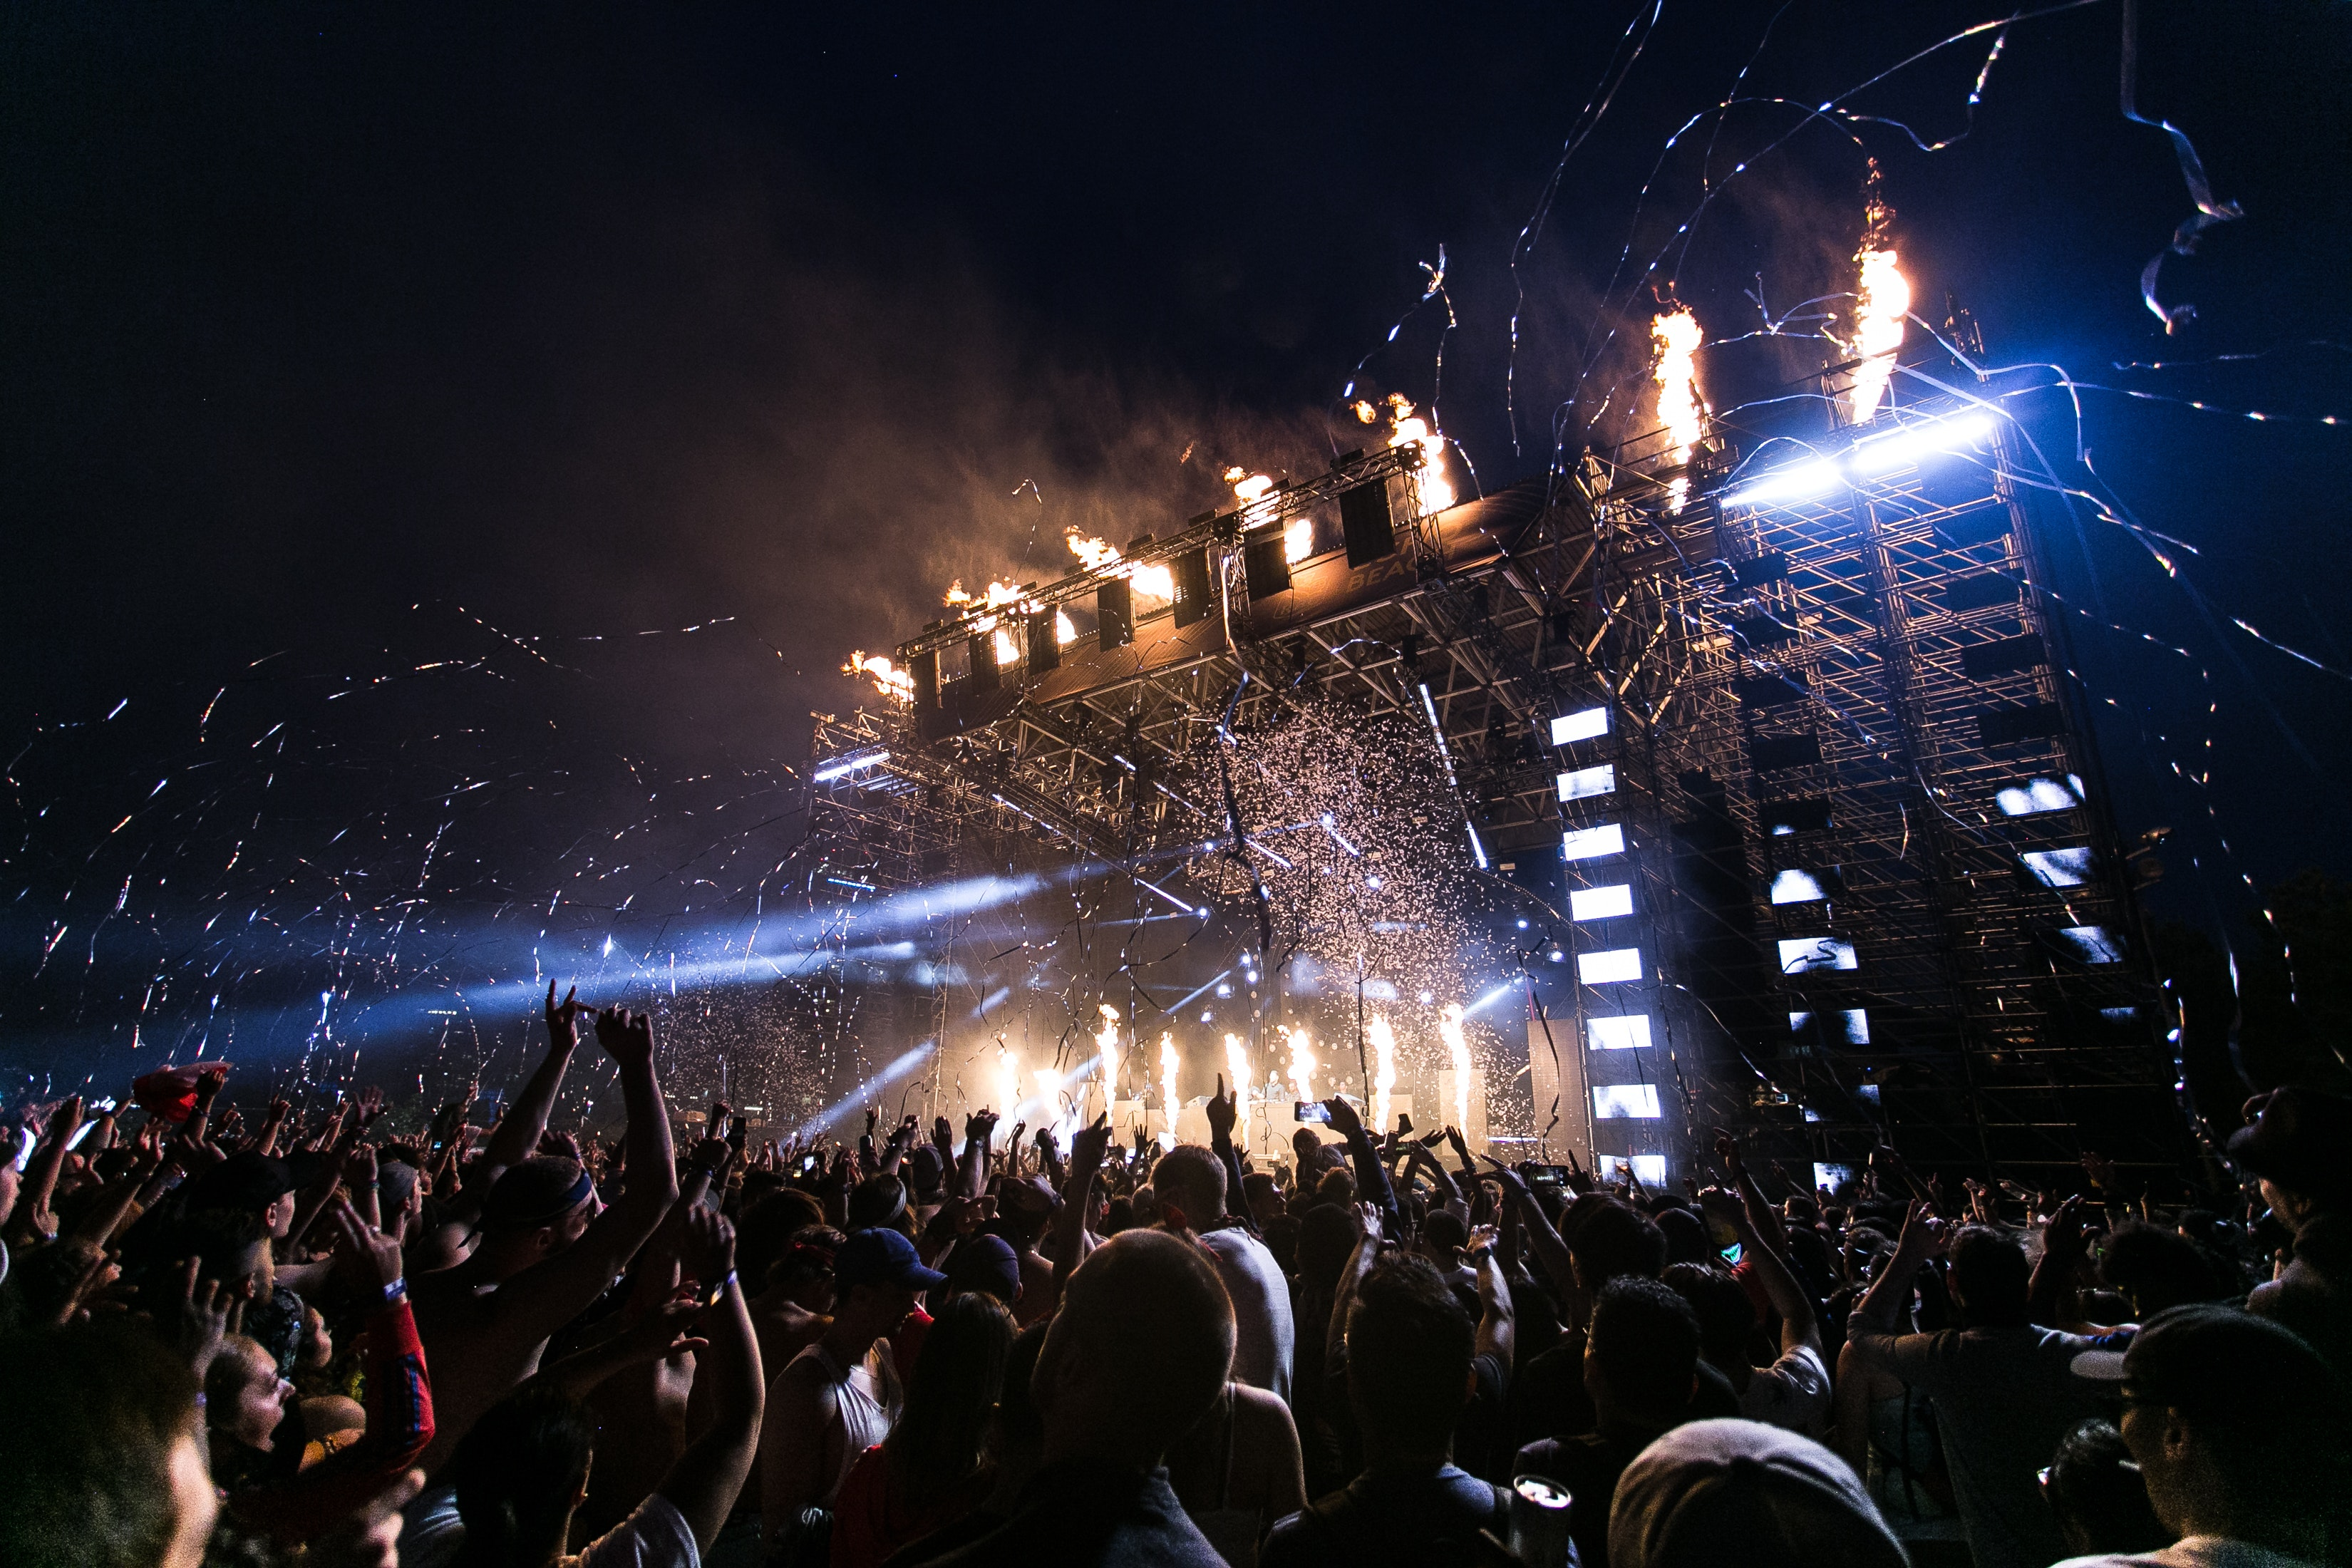

# K Nearest Neighbours Classifier

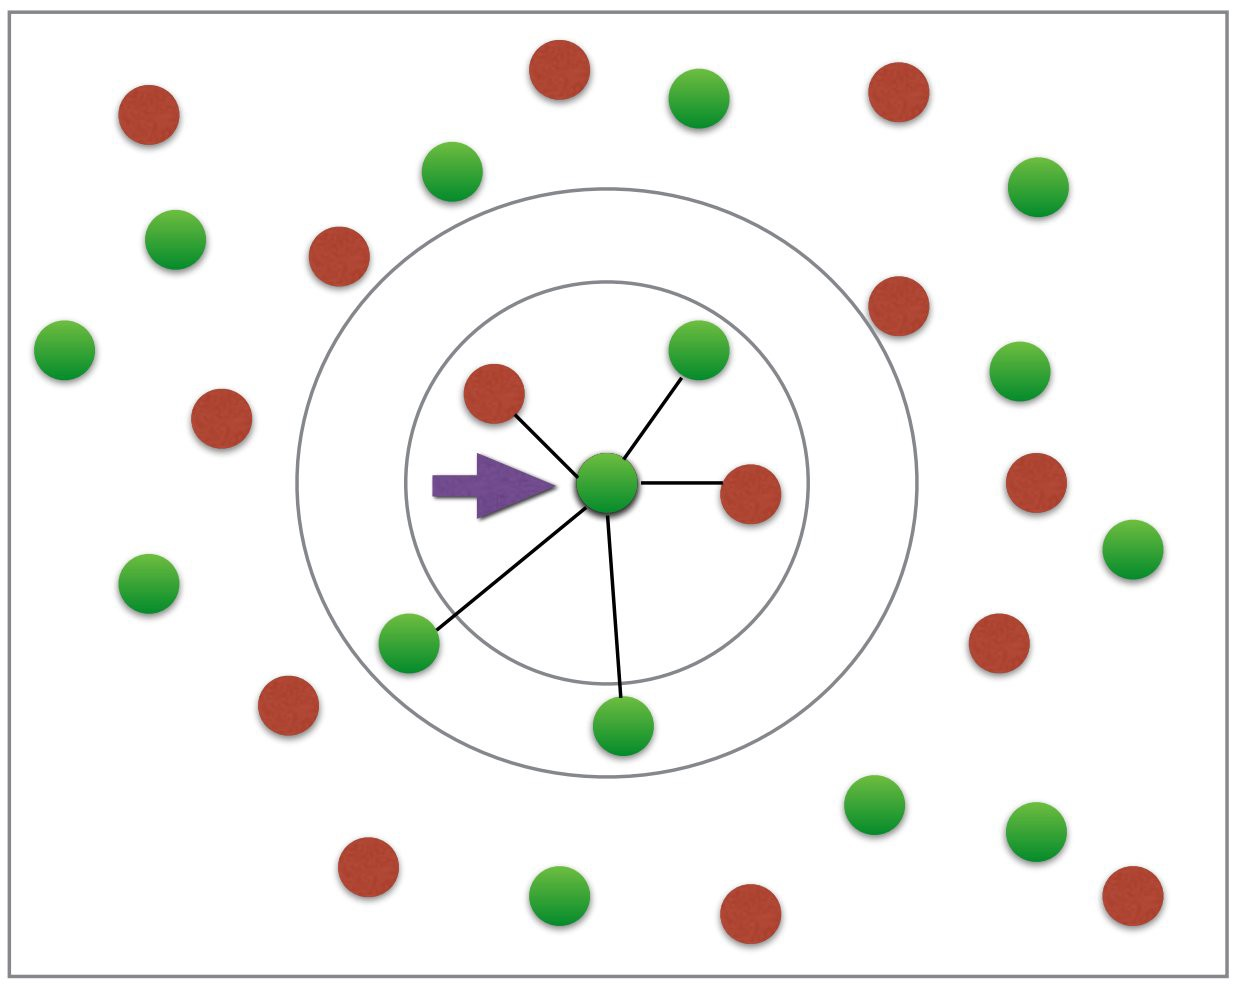

In [13]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


#  Extracting Feature vector and Target vector

In [2]:
import pandas as pd
data=pd.read_csv('music.csv')
data.head()

filename  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0  final_blues00.wav          0.335434         0.091088  0.130405  0.003521   
1  final_blues01.wav          0.343020         0.086142  0.112699  0.001450   
2  final_blues02.wav          0.346838         0.092210  0.132002  0.004620   
3  final_blues03.wav          0.363671         0.086856  0.132562  0.002447   
4  final_blues04.wav          0.335927         0.088291  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.285877          168244.728448              1972.723622   
1             1816.195860           90703.325185              2009.201575   
2             1788.642783          111322.537051              2085.045996   
3             1654.902168          112316.264385              1959.202709   
4             1630.737017           79648.228297              1948.459295   

   spectral_bandwidth_var  rolloff_mean  ...  mel_specgram_mean125  \
0           117298.851326   3714.477539  ...              5.875805   
1            65548.531475   3868.771221  ...              6.676786   
2            74755.260660   3995.568660  ...              6.897610   
3            83672.222326   3566.395358  ...              5.599164   
4            60221.595017   3469.910044  ...              7.565843   

   mel_specgram_var125  mel_specgram_mean126  mel_specgram_var126  \
0           121.360504              5.875805           121.360504   
1            97.969818              6.676786            97.969818   
2            69.025826              6.897610            69.025826   
3            74.678688              5.599164            74.678688   
4           126.943962              7.565843           126.943962   

   mel_specgram_mean127  mel_specgram_var127  mel_specgram_mean128  \
0              5.875805           121.360504              5.875805   
1              6.676786            97.969818              6.676786   
2              6.897610            69.025826              6.897610   
3              5.599164            74.678688              5.599164   
4              7.565843           126.943962              7.565843   

   mel_specgram_var128       tempo        label  
0           121.360504  129.199219  final_blues  
1            97.969818  123.046875  final_blues  
2            69.025826  123.046875  final_blues  
3            74.678688  123.046875  final_blues  
4           126.943962  123.046875  final_blues  

[5 rows x 343 columns]

In [3]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()


chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.335434         0.091088  0.130405  0.003521   
1          0.343020         0.086142  0.112699  0.001450   
2          0.346838         0.092210  0.132002  0.004620   
3          0.363671         0.086856  0.132562  0.002447   
4          0.335927         0.088291  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.285877          168244.728448              1972.723622   
1             1816.195860           90703.325185              2009.201575   
2             1788.642783          111322.537051              2085.045996   
3             1654.902168          112316.264385              1959.202709   
4             1630.737017           79648.228297              1948.459295   

   spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  \
0           117298.851326   3714.477539  1.080245e+06  ...   
1            65548.531475   3868.771221  6.718196e+05  ...   
2            74755.260660   3995.568660  7.958481e+05  ...   
3            83672.222326   3566.395358  9.266212e+05  ...   
4            60221.595017   3469.910044  6.102642e+05  ...   

   mel_specgram_mean125  mel_specgram_var125  mel_specgram_mean126  \
0              5.875805           121.360504              5.875805   
1              6.676786            97.969818              6.676786   
2              6.897610            69.025826              6.897610   
3              5.599164            74.678688              5.599164   
4              7.565843           126.943962              7.565843   

   mel_specgram_var126  mel_specgram_mean127  mel_specgram_var127  \
0           121.360504              5.875805           121.360504   
1            97.969818              6.676786            97.969818   
2            69.025826              6.897610            69.025826   
3            74.678688              5.599164            74.678688   
4           126.943962              7.565843           126.943962   

   mel_specgram_mean128  mel_specgram_var128       tempo        label  
0              5.875805           121.360504  129.199219  final_blues  
1              6.676786            97.969818  123.046875  final_blues  
2              6.897610            69.025826  123.046875  final_blues  
3              5.599164            74.678688  123.046875  final_blues  
4              7.565843           126.943962  123.046875  final_blues  

[5 rows x 342 columns]

In [4]:
#Checking null values
data.isnull().sum().sum()

0

In [5]:
#Feature vector
feature=data.drop(columns='label',axis=1)

In [7]:
#Target column
target=data['label']

In [120]:
#One hot encoding target variable
target=pd.get_dummies(target)
target.head()

final_blues  final_classical  final_country  final_disco  final_hiphop  \
0            1                0              0            0             0   
1            1                0              0            0             0   
2            1                0              0            0             0   
3            1                0              0            0             0   
4            1                0              0            0             0   

   final_jazz  final_metal  final_pop  final_reggae  final_rock  
0           0            0          0             0           0  
1           0            0          0             0           0  
2           0            0          0             0           0  
3           0            0          0             0           0  
4           0            0          0             0           0

In [121]:
def split_transform_data(X,Y,test_size,random_state):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test=train_test_split(feature,target,test_size=test_size,random_state=random_state)
    print("The number of training examples is :{}\n".format(X_train.shape[0]))
    print("The number of testing  examples is :{}".format(X_test.shape[0]))
    from sklearn.preprocessing import StandardScaler
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    usable_data={
        "training_data_feature":X_train,
        "training_data_target":Y_train,
        "testing_data_feature":X_test,
        "testing_data_target":Y_test
    }
    return usable_data
    

In [127]:
usable_data=split_transform_data(feature,target,0.1,42)

The number of training examples is :9000

The number of testing  examples is :1000


In [128]:
#Training data
X_train=usable_data['training_data_feature']
Y_train=usable_data['training_data_target']
X_test=usable_data['testing_data_feature']
Y_test=usable_data['testing_data_target']

In [173]:
#Label encoding train and test data
#Train data
Y_train_new=np.array(Y_train)
Y_train_int_encoded=[]
for j in range(Y_train.shape[0]):
    Y_train_int_encoded.append(np.argmax(Y_train_new[j]))
Y_train_int_encoded=np.array(Y_train_int_encoded)
    
#Test data
Y_test_new=np.array(Y_test)
Y_test_int_encoded=[]
for j in range(Y_test.shape[0]):
    Y_test_int_encoded.append(np.argmax(Y_test_new[j]))
Y_test_int_encoded=np.array(Y_test_int_encoded)
    


# Building KNN Classifier

In [174]:
def fit_knn_model(start_k,end_k,X_train_int_encoded,Y_train_int_encoded):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import cross_val_score
    import matplotlib.pyplot as plt 
    %matplotlib inline
    k_accuracy=[]
    for k in range(start_k,end_k+1):
        knn=KNeighborsClassifier(n_neighbors=k)
        scores=cross_val_score(knn,X_train,Y_train,cv=10,scoring='accuracy')
        k_accuracy.append(scores.mean())
    #Plotting accuracy vs value of k
    plt.figure(figsize=[20,10])
    plt.plot(range(start_k,end_k+1),k_accuracy,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
    plt.xlabel('Value of k')
    plt.ylabel('Cross Validation Accuracy')
    plt.show()
    return k_accuracy
#The function returns the mean value of cross validation score (10-fold) for the given range of values of k and plots the
#accuracy scores against respective k values

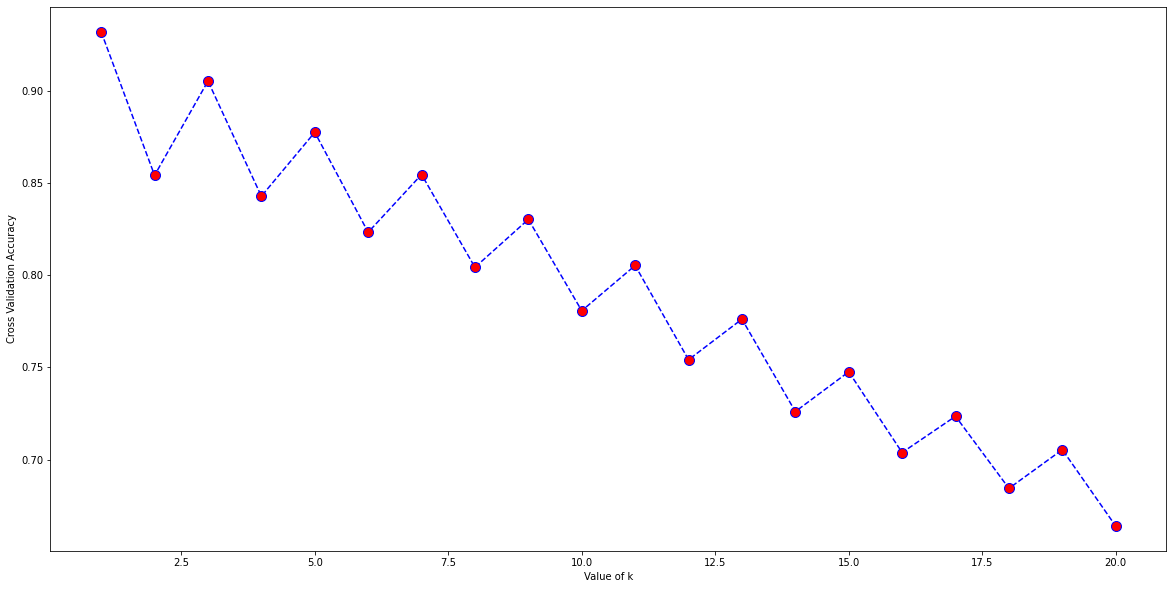

In [175]:
k_cross_val_accuracy=fit_knn_model(1,20,X_train,Y_train_int_encoded)

In [176]:
# A very smaller k value corresponds to a much rough decision boundary, so we didnt chose k=3
#Rather, chosen value of k =7
K=7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
knn_final=KNeighborsClassifier(n_neighbors=K)
#Finally chosen knn with K=7
knn_final.fit(X_train,Y_train_int_encoded)

KNeighborsClassifier(n_neighbors=7)

# 10-fold Cross validation for k=7

In [177]:
scores_final=cross_val_score(knn_final,X_train,Y_train_int_encoded,cv=10,scoring='accuracy')
print('The 10-fold cross validaiton score for k ={} : \n {}'.format(K,scores_final))

The 10-fold cross validaiton score for k =7 : 
 [0.89444444 0.91222222 0.9        0.88333333 0.88777778 0.88222222
 0.90777778 0.88888889 0.9        0.86222222]


# Accuracy on test dataset

In [136]:
predictions=knn_final.predict(X_test)
test_acc=accuracy_score(Y_test_int_encoded,predictions)
print('The accuracy of the KNN model on test dataset is : {}'.format(test_acc))


The accuracy of the KNN model on test dataset is : 0.917


# Classification_Report

In [178]:
def classification_report_final(X_test,Y_test,trained_model,target_names):
    from sklearn.metrics import classification_report
    predictions=trained_model.predict(X_test)
    report=classification_report(Y_test,predictions,target_names=target_names)
    print(report)


In [179]:
classification_report_final(X_test,Y_test_int_encoded,knn_final,['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'])

              precision    recall  f1-score   support

       blues       0.95      0.93      0.94       112
   classical       0.92      0.96      0.94        99
     country       0.86      0.91      0.88        86
       disco       0.87      0.99      0.93        91
      hiphop       0.87      0.93      0.90       104
        jazz       0.91      0.91      0.91        98
       metal       0.97      0.96      0.96        95
         pop       0.96      0.82      0.88       110
      reggae       0.91      0.92      0.91       120
        rock       0.96      0.86      0.91        85

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [180]:
labels=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

# Confusion Matrix

In [181]:
predictions=knn_final.predict(X_test)

In [182]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_int_encoded,predictions)

In [183]:
print('The confusion matrix is :\n{}'.format(cm))

The confusion matrix is :
[[104   1   1   0   0   3   0   0   2   1]
 [  1  95   0   0   0   3   0   0   0   0]
 [  1   2  78   0   0   1   0   1   2   1]
 [  0   0   0  90   1   0   0   0   0   0]
 [  0   1   0   1  97   0   2   1   2   0]
 [  1   4   4   0   0  89   0   0   0   0]
 [  1   0   0   1   1   0  91   0   0   1]
 [  0   0   2   5   8   0   0  90   5   0]
 [  0   0   0   3   4   1   0   2 110   0]
 [  1   0   6   3   0   1   1   0   0  73]]


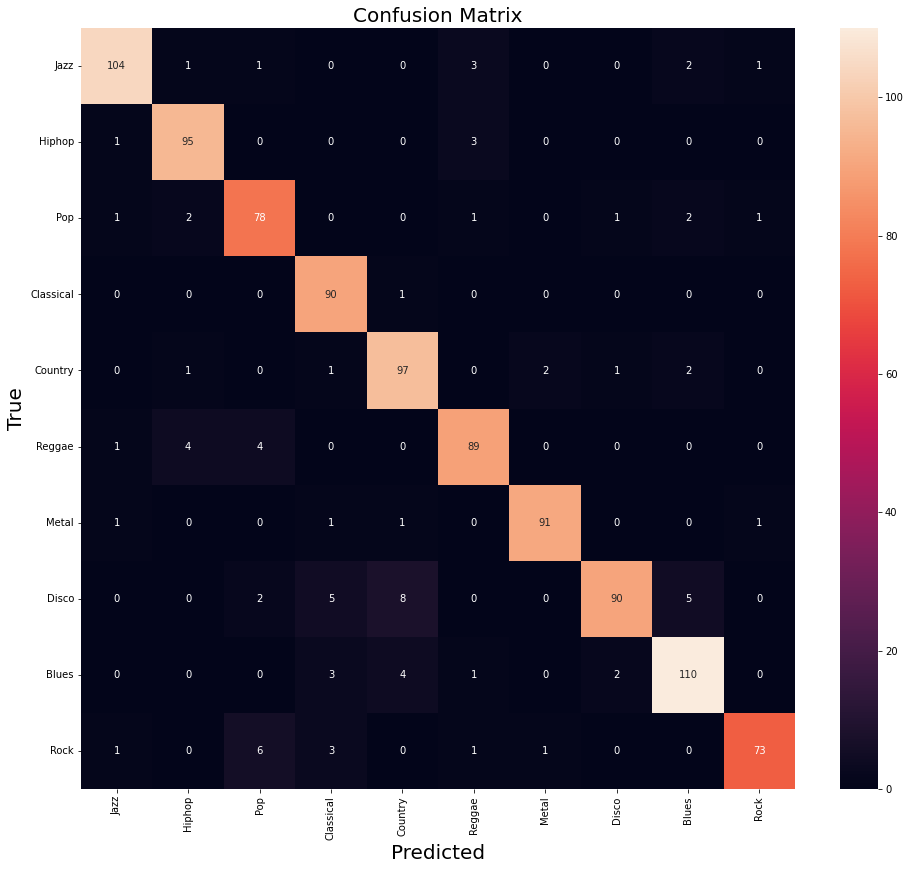

In [184]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
labels={"Blues","Classical","Country","Disco","Hiphop","Jazz","Metal","Pop","Reggae","Rock"} 
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)
plt.title('Confusion Matrix', fontsize=20)
plt.show()


# Saving the KNN Model

In [186]:
import pickle 

# Its important to use binary mode 
knnPickle = open('knn_music_classif_file', 'wb') 

# source, destination 
pickle.dump(knn_final, knnPickle)         
loaded_model = pickle.load(open('knn_music_classif_file', 'rb'))
result = loaded_model.predict(X_test) 


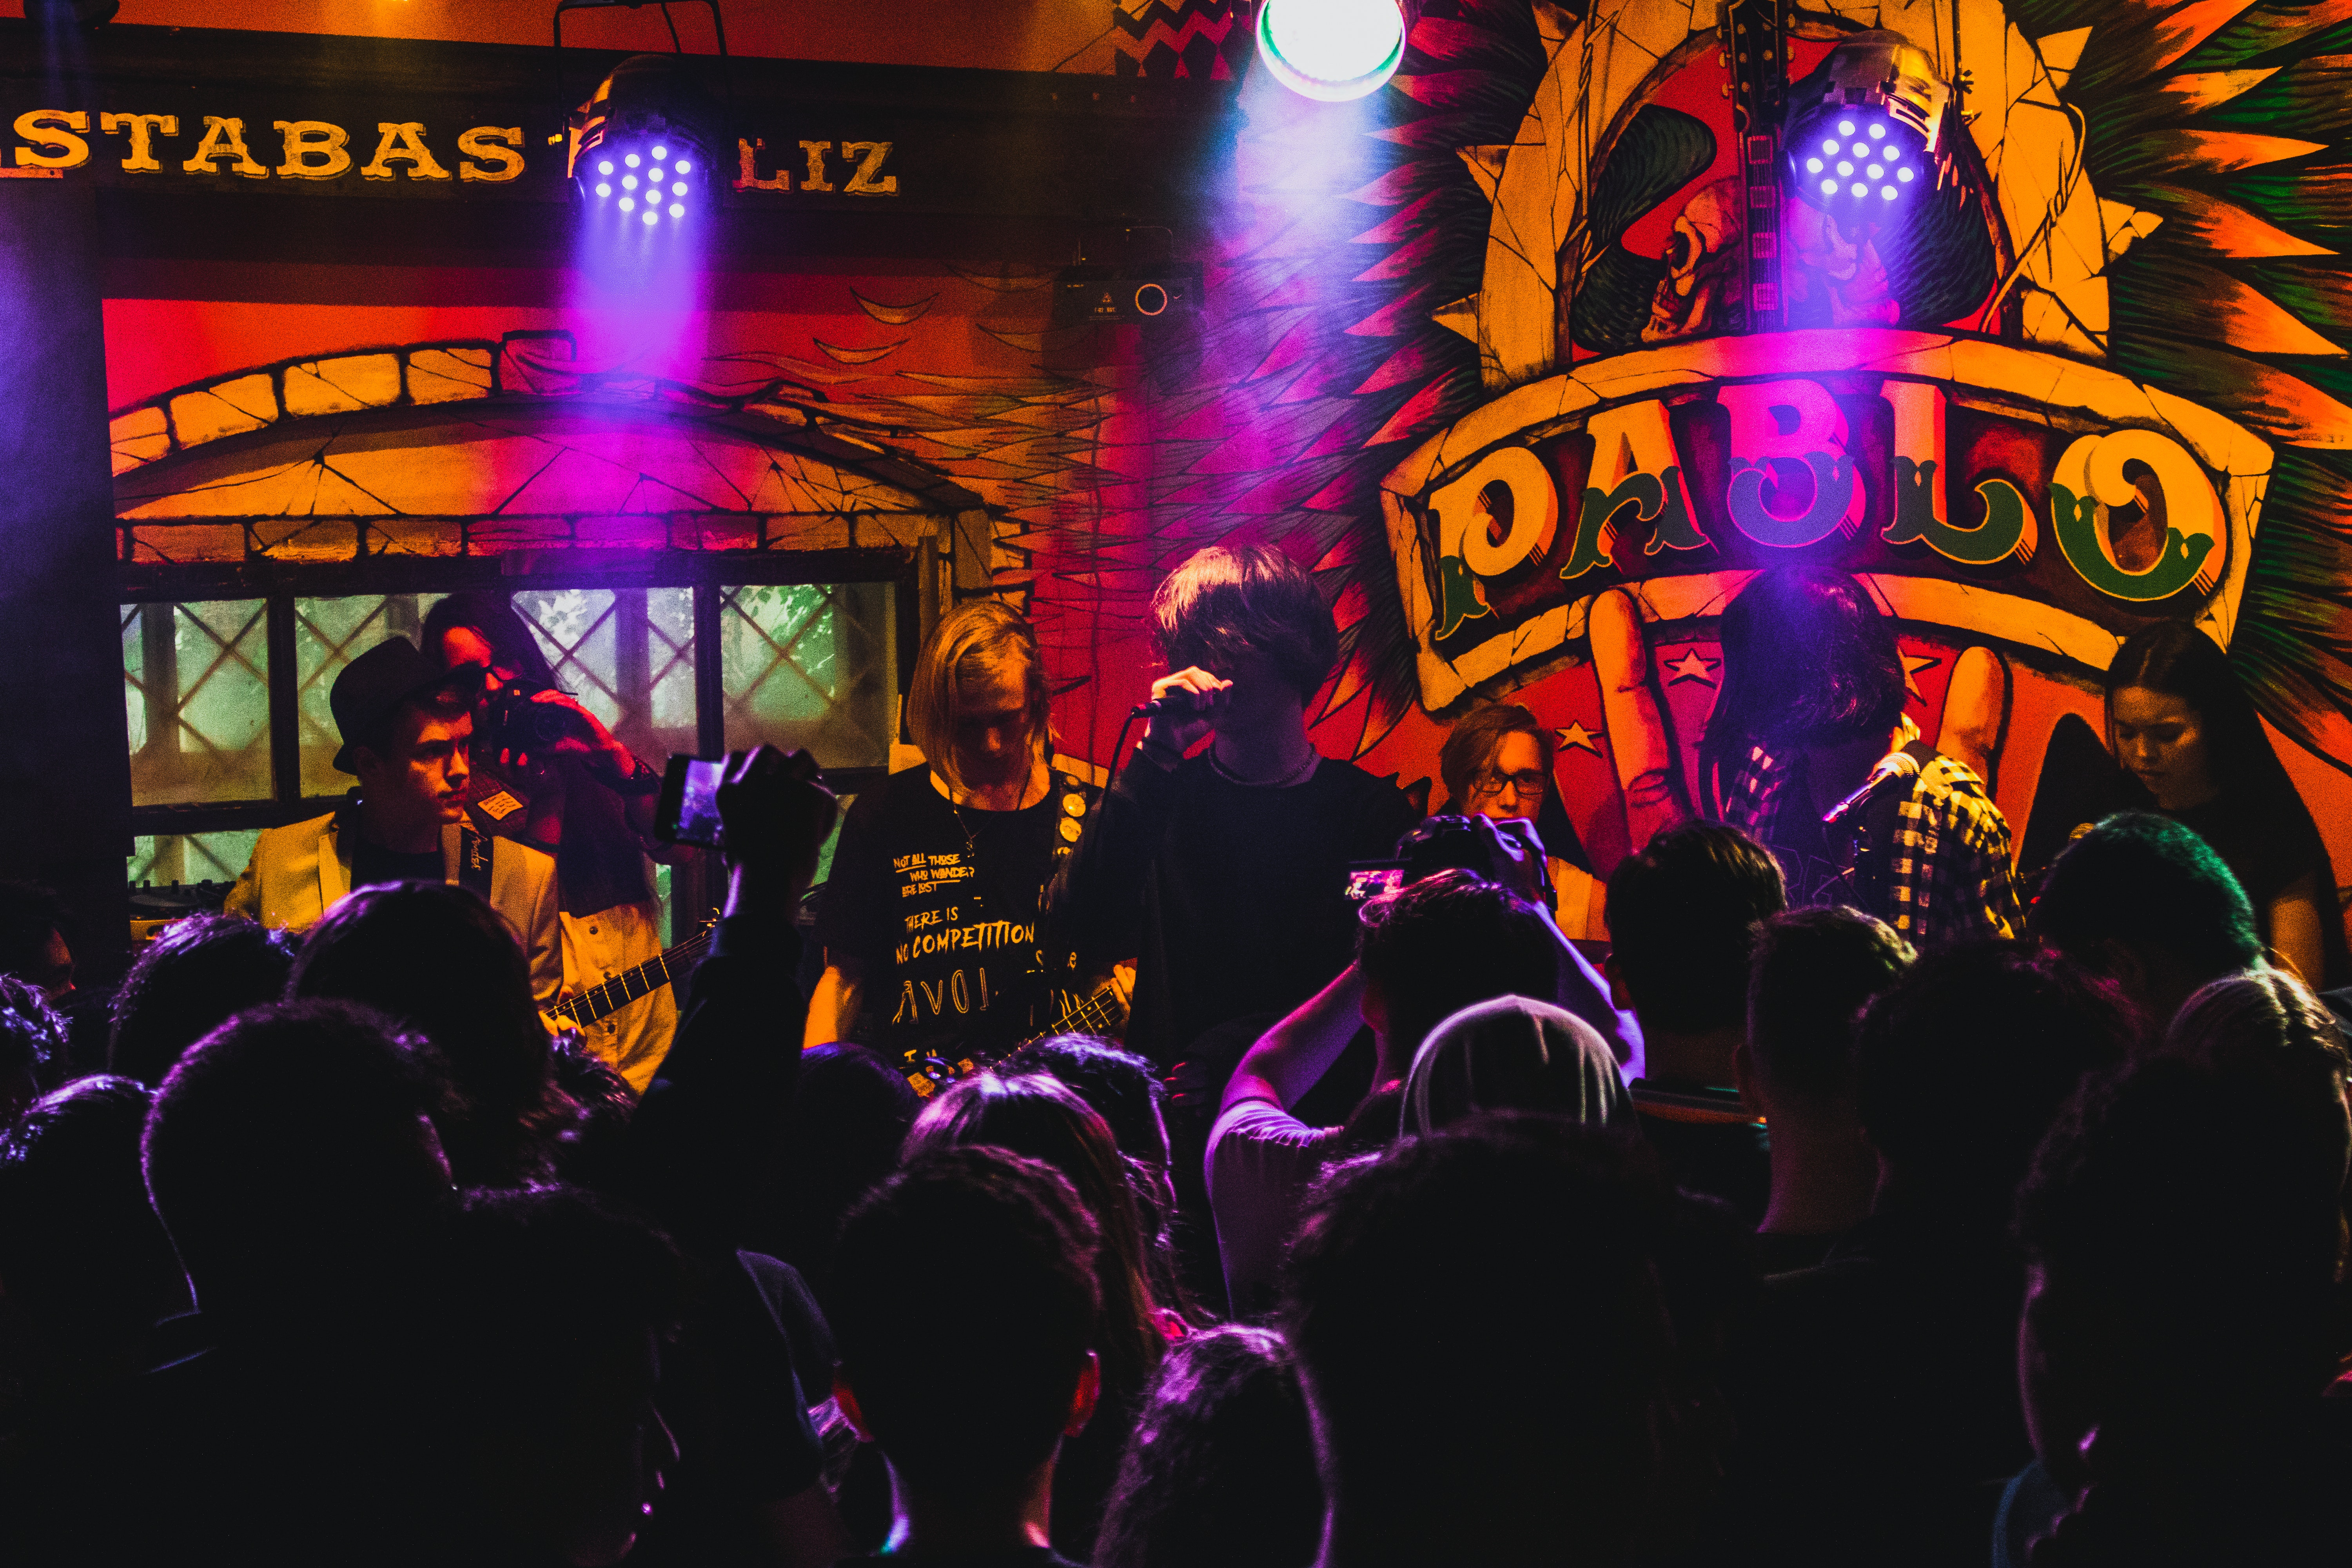